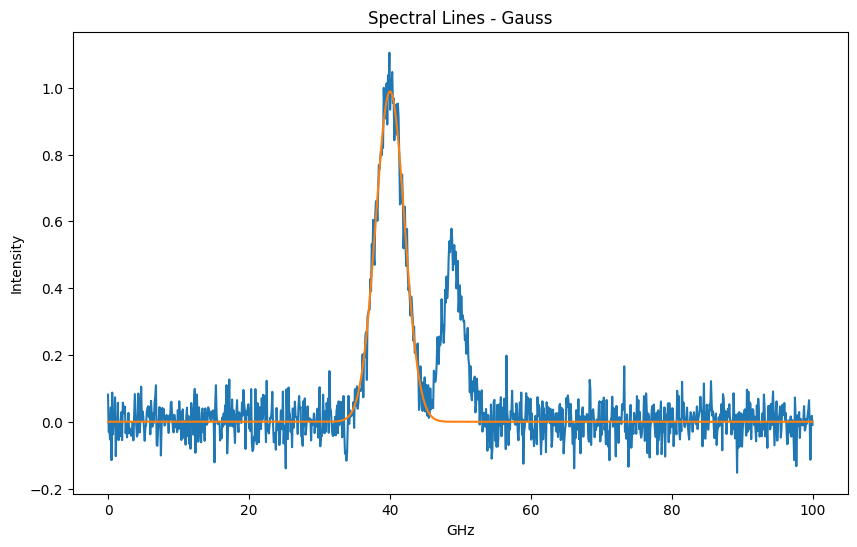

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 1000
    # variables        = 3
    chi-square         = 8.92428441
    reduced chi-square = 0.00895114
    Akaike info crit   = -4712.97913
    Bayesian info crit = -4698.25587
    R-squared          = 0.77340486
[[Variables]]
    A:      0.98919881 +/- 0.01924438 (1.95%) (init = 1)
    mu:     40.0308261 +/- 0.04599634 (0.11%) (init = 40)
    sigma:  2.04735254 +/- 0.04599634 (2.25%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, sigma) = -0.5773


In [169]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(0, 100, 1000)

spectrum = gaussian(x, 1, 40, 2) + gaussian(x, 0.5, 49, 1.5)

np.random.seed(1)
noise_level = 0.05
spectrum += np.random.normal(0, noise_level, len(x))

X_values = np.array(x)
Y_values = np.array(spectrum)

gmodel = Model(gaussian)

result = gmodel.fit(Y_values, A=1, mu=40, sigma=0.1, x=X_values)

plt.figure(figsize=(10, 6))
plt.plot(x, spectrum)
plt.plot(x, result.best_fit, '-')
plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.show()

print(result.fit_report())


203


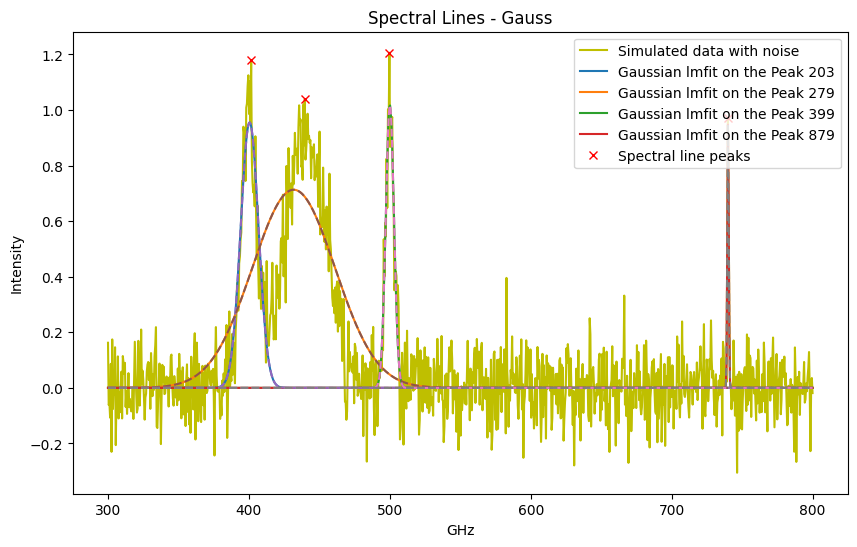

Peak: (401.6016016016016, 1.1794622726990494)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 60
    # data points      = 1000
    # variables        = 3
    chi-square         = 65.3902936
    reduced chi-square = 0.06558705
    Akaike info crit   = -2721.38145
    Bayesian info crit = -2706.65818
    R-squared          = 0.10315029
[[Variables]]
    A:      0.95553606 +/- 0.06623694 (6.93%) (init = 1)
    mu:     400.491333 +/- 0.50682845 (0.13%) (init = 401.6016)
    sigma:  6.33196371 +/- 0.50682845 (8.00%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, sigma) = -0.5774
Peak: (439.63963963963965, 1.0397247125403517)
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 52
    # data points      = 1000
    # variables        = 3
    chi-square         = 33.0048050
    reduced chi-square = 0.03310412
    Akaike info crit   = -3405.102

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from scipy import signal

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(300, 800, 1000)

spectrum = gaussian(x, 1, 400, 5) + gaussian(x, 0.9, 440, 15) + gaussian(x, 1, 500, 3) + gaussian(x, 0.9, 740, 0.5)

np.random.seed(1)
noise_level = 0.1
spectrum += np.random.normal(0, noise_level, len(x))

X_values = np.array(x)
Y_values = np.array(spectrum)

peaks = signal.find_peaks(Y_values, prominence=0.8, width=1)[0]
print(peaks[0])


gmodel = Model(gaussian)
results = {}

for i in peaks:
    results[i] = gmodel.fit(Y_values, A=1, mu=X_values[i], sigma=1, x=X_values, method='least_squares')

plt.figure(figsize=(10, 6))
plt.plot(x, spectrum, color= 'y', label= 'Simulated data with noise')

for i in peaks:
    plt.plot(x, results[i].best_fit, '-', label=f'Gaussian lmfit on the Peak {i}')

plt.plot(X_values[peaks], Y_values[peaks], 'rx', label='Spectral line peaks')

for i, result in results.items():
    plt.plot(X_values, result.best_fit, '--')

plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.legend()
plt.show()

for i, result in results.items():
    print(f"Peak: ({X_values[i]}, {Y_values[i]})")
    print(result.fit_report())


In [171]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from scipy import signal

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

x = np.linspace(300, 800, 1000)

spectrum = gaussian(x, 1, 400, 5) + gaussian(x, 0.9, 440, 15) + gaussian(x, 1, 500, 3) + gaussian(x, 0.9, 740, 0.5)

np.random.seed(1)
noise_level = 0.1
spectrum += np.random.normal(0, noise_level, len(x))

X_values = np.array(x)
Y_values = np.array(spectrum)

peaks = signal.find_peaks(Y_values, prominence=0.8, width=1)[0]
print(peaks[0])


gmodel = Model(gaussian)
results = {}

for i in peaks:
    start_idx = max(0, i - 50)
    end_idx = min(len(x), i + 50)
    results[i] = gmodel.fit(
        Y_values[start_idx:end_idx],
        A=1,
        mu=X_values[i],
        sigma=1,
        x=X_values[start_idx:end_idx],
        method='differential_evolution',
        bounds={'A': (0, 10), 'mu': (300, 800), 'sigma': (0.1, 20)}
    )

plt.figure(figsize=(10, 6))
plt.plot(x, spectrum, color='y', label='Simulated data with noise')

for i in peaks:
    plt.plot(x, results[i].best_fit, '-', label=f'Gaussian lmfit on Peak {i}')

plt.plot(X_values[peaks], Y_values[peaks], 'rx', label='Spectral line peaks')

for i, result in results.items():
    plt.plot(X_values, result.best_fit, '--')

plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.legend()
plt.show()

for i, result in results.items():
    print(f"Peak: ({X_values[peaks[i]]}, {Y_values[peaks[i]]})")
    print(result.fit_report())

203


ValueError: differential_evolution requires finite bound for all varying parameters

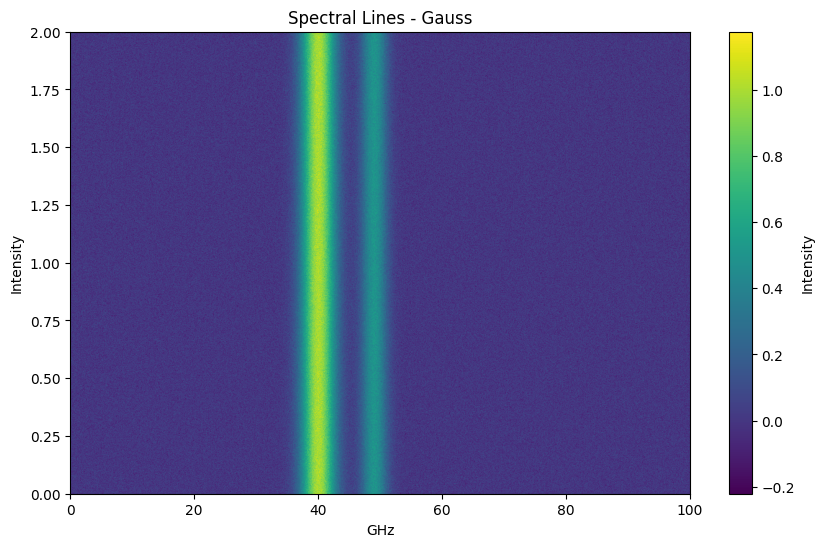

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from math import trunc
from matplotlib.colors import LinearSegmentedColormap

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def wav2RGB(Wavelength):
    Gamma = 0.80
    IntensityMax = 255.0
    def Adjust(Color, Factor):
        if Color == 0.0:
            return 0.0
        else:
            return round(IntensityMax * (Color * Factor)**Gamma)
    if 380 <= trunc(Wavelength) and trunc(Wavelength) <= 439:
        Red = -(Wavelength - 440.0) / (440.0 - 380.0)
        Green = 0.0
        Blue = 1.0
    elif 440 <= trunc(Wavelength) and trunc(Wavelength) <= 489:
        Red = 0.0
        Green = (Wavelength - 440.0) / (490.0 - 440.0)
        Blue = 1.0
    elif 490 <= trunc(Wavelength) and trunc(Wavelength) <= 509:
        Red = 0.0
        Green = 1.0
        Blue = -(Wavelength - 510.0) / (510.0 - 490.0)
    elif 510 <= trunc(Wavelength) and trunc(Wavelength) <= 579:
        Red = (Wavelength - 510.0) / (580.0 - 510.0)
        Green = 1.0
        Blue = 0.0
    elif 580 <= trunc(Wavelength) and trunc(Wavelength) <= 644:
        Red = 1.0
        Green = -(Wavelength - 645.0) / (645.0 - 580.0)
        Blue = 0.0
    elif 645 <= trunc(Wavelength) and trunc(Wavelength) <= 780:
        Red = 1.0
        Green = 0.0
        Blue = 0.0
    else:
        Red = 0.0
        Green = 0.0
        Blue = 0.0

    if 380 <= trunc(Wavelength) and trunc(Wavelength) <= 419:
        factor = 0.3 + 0.7*(Wavelength - 380.0) / (420.0 - 380.0)
    elif 420 <= trunc(Wavelength) and trunc(Wavelength) <= 700:
        factor = 1.0
    elif 701 <= trunc(Wavelength) and trunc(Wavelength) <= 780:
        factor = 0.3 + 0.7*(780.0 - Wavelength) / (780.0 - 700.0)
    else:
        factor = 0.0
    R = Adjust(Red, factor)
    G = Adjust(Green, factor)
    B = Adjust(Blue, factor)
    return [int(R), int(G), int(B)]

def generateColor(color):
      nstep = 300
      minW = 400
      maxW = 700
      bandW = maxW - minW
      colorTuple = ()
      for i in range(nstep + 1):
        wlength = minW + i * bandW / nstep
        colorTuple += ((1.0 * i / nstep, wav2RGB(wlength)[color] / 255.0, wav2RGB(wlength)[color] / 255.0),)
      return colorTuple

def generateGradient():
    return {'red':  generateColor(0),
            'green': generateColor(1),
            'blue':  generateColor(2)}

visibleSpec = LinearSegmentedColormap('visible', generateGradient())

x = np.linspace(0, 100, 1000)
y = np.linspace(0, 2, 1000)  

X, Y = np.meshgrid(x, y)

spectrum = gaussian(X, 1, 40, 2) + gaussian(X, 0.5, 49, 1.5)

np.random.seed(1)
noise_level = 0.05
spectrum += np.random.normal(0, noise_level, spectrum.shape)

plt.figure(figsize=(10, 6))
plt.imshow(spectrum, origin='lower', aspect='auto', extent=[x[0], x[-1], y[0], y[-1]])
plt.colorbar(label='Intensity')
plt.xlabel('GHz')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import trunc
from matplotlib.colors import LinearSegmentedColormap

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def wav2RGB(Wavelength):
    Gamma = 0.80
    IntensityMax = 255.0
    def Adjust(Color, Factor):
        if Color == 0.0:
            return 0.0
        else:
            return round(IntensityMax * (Color * Factor)**Gamma)
    if 380 <= trunc(Wavelength) and trunc(Wavelength) <= 439:
        Red = -(Wavelength - 440.0) / (440.0 - 380.0)
        Green = 0.0
        Blue = 1.0
    elif 440 <= trunc(Wavelength) and trunc(Wavelength) <= 489:
        Red = 0.0
        Green = (Wavelength - 440.0) / (490.0 - 440.0)
        Blue = 1.0
    elif 490 <= trunc(Wavelength) and trunc(Wavelength) <= 509:
        Red = 0.0
        Green = 1.0
        Blue = -(Wavelength - 510.0) / (510.0 - 490.0)
    elif 510 <= trunc(Wavelength) and trunc(Wavelength) <= 579:
        Red = (Wavelength - 510.0) / (580.0 - 510.0)
        Green = 1.0
        Blue = 0.0
    elif 580 <= trunc(Wavelength) and trunc(Wavelength) <= 644:
        Red = 1.0
        Green = -(Wavelength - 645.0) / (645.0 - 580.0)
        Blue = 0.0
    elif 645 <= trunc(Wavelength) and trunc(Wavelength) <= 780:
        Red = 1.0
        Green = 0.0
        Blue = 0.0
    else:
        Red = 0.0
        Green = 0.0
        Blue = 0.0
  
    if 380 <= trunc(Wavelength) and trunc(Wavelength) <= 419:
        factor = 0.3 + 0.7*(Wavelength - 380.0) / (420.0 - 380.0)
    elif 420 <= trunc(Wavelength) and trunc(Wavelength) <= 700:
        factor = 1.0
    elif 701 <= trunc(Wavelength) and trunc(Wavelength) <= 780:
        factor = 0.3 + 0.7*(780.0 - Wavelength) / (780.0 - 700.0)
    else:
        factor = 0.0
    R = Adjust(Red, factor)
    G = Adjust(Green, factor)
    B = Adjust(Blue, factor)
    return [int(R), int(G), int(B)]

def generateColor(color):
      nstep = 300
      minW = 400
      maxW = 700
      bandW = maxW - minW
      colorTuple = ()
      for i in range(nstep + 1):
        wlength = minW + i * bandW / nstep
        colorTuple += ((1.0 * i / nstep, wav2RGB(wlength)[color] / 255.0, wav2RGB(wlength)[color] / 255.0),)
      return colorTuple

def generateGradient():
    return {'red':  generateColor(0),
            'green': generateColor(1),
            'blue':  generateColor(2)}

visibleSpec = LinearSegmentedColormap('visible', generateGradient())

x = np.linspace(0, 100, 1000)
y = np.linspace(0, 2, 1000)  


X, Y = np.meshgrid(x, y)

spectrum = gaussian(X, 1, 40, 2) + gaussian(X, 0.5, 49, 1.5)

np.random.seed(1)
noise_level = 0.05
spectrum += np.random.normal(0, noise_level, spectrum.shape)

plt.figure(figsize=(10, 6))
plt.imshow(spectrum, origin='lower', aspect='auto', extent=[x[0], x[-1], y[0], y[-1]])
plt.colorbar(label='Intensity')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from math import trunc
from matplotlib.colors import LinearSegmentedColormap

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def wav2RGB(Wavelength):
    Gamma = 0.80
    IntensityMax = 255.0
    def Adjust(Color, Factor):
        if Color == 0.0:
            return 0.0
        else:
            return round(IntensityMax * (Color * Factor)**Gamma)
    if 380 <= trunc(Wavelength) and trunc(Wavelength) <= 439:
        Red = -(Wavelength - 440.0) / (440.0 - 380.0)
        Green = 0.0
        Blue = 1.0
    elif 440 <= trunc(Wavelength) and trunc(Wavelength) <= 489:
        Red = 0.0
        Green = (Wavelength - 440.0) / (490.0 - 440.0)
        Blue = 1.0
    elif 490 <= trunc(Wavelength) and trunc(Wavelength) <= 509:
        Red = 0.0
        Green = 1.0
        Blue = -(Wavelength - 510.0) / (510.0 - 490.0)
    elif 510 <= trunc(Wavelength) and trunc(Wavelength) <= 579:
        Red = (Wavelength - 510.0) / (580.0 - 510.0)
        Green = 1.0
        Blue = 0.0
    elif 580 <= trunc(Wavelength) and trunc(Wavelength) <= 644:
        Red = 1.0
        Green = -(Wavelength - 645.0) / (645.0 - 580.0)
        Blue = 0.0
    elif 645 <= trunc(Wavelength) and trunc(Wavelength) <= 780:
        Red = 1.0
        Green = 0.0
        Blue = 0.0
    else:
        Red = 0.0
        Green = 0.0
        Blue = 0.0
    # Let the intensity fall off near the vision limits
    if 380 <= trunc(Wavelength) and trunc(Wavelength) <= 419:
        factor = 0.3 + 0.7*(Wavelength - 380.0) / (420.0 - 380.0)
    elif 420 <= trunc(Wavelength) and trunc(Wavelength) <= 700:
        factor = 1.0
    elif 701 <= trunc(Wavelength) and trunc(Wavelength) <= 780:
        factor = 0.3 + 0.7*(780.0 - Wavelength) / (780.0 - 700.0)
    else:
        factor = 0.0
    R = Adjust(Red, factor)
    G = Adjust(Green, factor)
    B = Adjust(Blue, factor)
    return [int(R), int(G), int(B)]


x = np.linspace(300, 900, 1000)
y = np.linspace(0, 2, 1000)  # Define the range of y values

# Create a grid of x and y values
X, Y = np.meshgrid(x, y)

# Evaluate the Gaussian function for each point on the grid
spectrum = gaussian(X, 1, 450, 2) + gaussian(X, 0.5, 600, 1.5)

np.random.seed(1)
noise_level = 0.05
spectrum += np.random.normal(0, noise_level, spectrum.shape)

wavelengths = np.linspace(400, 700, 256)  # Define the range of wavelengths (from violet to red)
colors_rgb = wav2RGB(wavelengths)  # Convert wavelengths to RGB colors
cmap = colors.ListedColormap(colors_rgb)

plt.figure(figsize=(10, 6))
plt.imshow(spectrum, origin='lower', aspect='auto', extent=[x[0], x[-1], y[0], y[-1]], cmap=cmap)
plt.colorbar(label='Intensity')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Spectral Lines - Gauss')
plt.show()



TypeError: type numpy.ndarray doesn't define __trunc__ method

In [9]:
from gentable import wavelen2rgb
import zlib
import base64

clrs = []

for wl in range(380, 781):
    clrs += wavelen2rgb(wl)

raw = bytes(clrs)

compressed = zlib.compress(raw, 9)

enc = base64.b64encode(compressed)


waves = [300.0, 400.0, 600.0]
rgb = [wavelen2rgb(waves[i], MaxIntensity=255) for i in range(3)]
print(rgb)


TypeError: wavelen2rgb() got an unexpected keyword argument 'MaxIntensity'